# Velocity_Dominated_Singularities_in_Irrotational_Dust_Cosmologies_Eardley_Liang_Sachs
##  Geoff Cope
##  Univeristy of Utah
##  𐐏𐐭𐑌𐐲𐑂𐐲𐑉𐑅𐐮𐐻𐐨 𐐲𐑂 𐐏𐐭𐐻𐐫
##  January 19, 2022

https://aip.scitation.org/doi/abs/10.1063/1.1665859

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,x,y,z,dt,dx,dy,dz = symbols('t x y z dt dx dy dz')

In [4]:
phi = Function('phi')(z,t)
phi

In [5]:
psi = Function('psi')(z,t)
psi

In [6]:
variables = Matrix([t,x,y,z])
variables

⎡t⎤
⎢ ⎥
⎢x⎥
⎢ ⎥
⎢y⎥
⎢ ⎥
⎣z⎦

In [7]:
differentials = Matrix([dt,dx,dy,dz])
differentials 

⎡dt⎤
⎢  ⎥
⎢dx⎥
⎢  ⎥
⎢dy⎥
⎢  ⎥
⎣dz⎦

In [8]:
lineElement = expand( -dt**2 + phi**2 * (dx**2 + dy**2) + psi**2 * dz**2)
lineElement

In [9]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡-1     0         0         0    ⎤
⎢                                ⎥
⎢     2                          ⎥
⎢0   φ (z, t)     0         0    ⎥
⎢                                ⎥
⎢               2                ⎥
⎢0      0      φ (z, t)     0    ⎥
⎢                                ⎥
⎢                         2      ⎥
⎣0      0         0      ψ (z, t)⎦

In [10]:
import sympy

In [11]:
m = sympy.Array(g)
m

⎡-1     0         0         0    ⎤
⎢                                ⎥
⎢     2                          ⎥
⎢0   φ (z, t)     0         0    ⎥
⎢                                ⎥
⎢               2                ⎥
⎢0      0      φ (z, t)     0    ⎥
⎢                                ⎥
⎢                         2      ⎥
⎣0      0         0      ψ (z, t)⎦

In [12]:
from einsteinpy.symbolic import *

In [13]:
syms = sympy.symbols("t x y z")
t,x,y,z = syms

In [14]:
metric = MetricTensor(m,syms)

In [15]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡                                                                                           
⎢                                                                                           
⎢                                                                                           
⎢                                                                    ⎡             ∂        
⎢                                                                    ⎢             ──(φ(z, t
⎢                                                                    ⎢             ∂t       
⎢⎡0           0                    0                    0         ⎤  ⎢     0       ─────────
⎢⎢                                                                ⎥  ⎢               φ(z, t)
⎢⎢           ∂                                                    ⎥  ⎢                      
⎢⎢0  φ(z, t)⋅──(φ(z, t))           0                    0         ⎥  ⎢∂                     
⎢⎢           ∂t                                                   ⎥  ⎢

In [16]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡               2                2                                                          
⎢              ∂                ∂                                                           
⎢             ───(ψ(z, t))   2⋅───(φ(z, t))                                                 
⎢               2                2                                                          
⎢             ∂t               ∂t                                                           
⎢           - ──────────── - ──────────────                                                 
⎢               ψ(z, t)         φ(z, t)                                                     
⎢                                                                                           
⎢                                                        ⎛          2                       
⎢                                                        ⎜         ∂             ⎛∂         
⎢                                                        ⎜φ(z, t)⋅───(

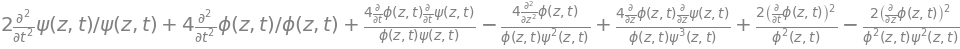

In [17]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [18]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡                                    2                                                      
⎢                                   ∂                                                       
⎢    ∂           ∂             2.0⋅───(φ(z, t))       ∂           ∂                 ⎛∂      
⎢2.0⋅──(φ(z, t))⋅──(ψ(z, t))         2            2.0⋅──(φ(z, t))⋅──(ψ(z, t))   1.0⋅⎜──(φ(z,
⎢    ∂t          ∂t                ∂z                 ∂z          ∂z                ⎝∂t     
⎢─────────────────────────── - ──────────────── + ─────────────────────────── + ────────────
⎢      φ(z, t)⋅ψ(z, t)                  2                        3                    2     
⎢                              φ(z, t)⋅ψ (z, t)         φ(z, t)⋅ψ (z, t)             φ (z, t
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

In [19]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [20]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [21]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡               2                2                                                          
⎢              ∂                ∂                                                           
⎢             ───(ψ(z, t))   2⋅───(φ(z, t))                                                 
⎢               2                2                                                          
⎢             ∂t               ∂t                                                           
⎢           - ──────────── - ──────────────                                                 
⎢               ψ(z, t)         φ(z, t)                                                     
⎢                                                                                           
⎢                                                        ⎛          2                       
⎢                                                        ⎜         ∂             ⎛∂         
⎢                                                        ⎜φ(z, t)⋅───(

In [22]:
einsteinSimplified = simplify(einst.tensor())
einsteinSimplified

⎡                                                                     2                     
⎢             2       ∂           ∂                                  ∂                      
⎢2.0⋅φ(z, t)⋅ψ (z, t)⋅──(φ(z, t))⋅──(ψ(z, t)) - 2.0⋅φ(z, t)⋅ψ(z, t)⋅───(φ(z, t)) + 2.0⋅φ(z, 
⎢                     ∂t          ∂t                                  2                     
⎢                                                                   ∂z                      
⎢───────────────────────────────────────────────────────────────────────────────────────────
⎢                                                                              2        3   
⎢                                                                             φ (z, t)⋅ψ (z,
⎢                                                                                           
⎢                                                                                           
⎢                                                                     

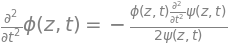

In [24]:
Eq( diff(phi,t,t),solve(ricciSimplified[0,0], diff(phi,t,t) )[0] ) 

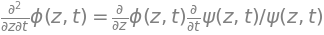

In [26]:
Eq(diff(phi,z,t),solve( ricciSimplified[3,0] , diff(phi,z,t) )[0] ) 

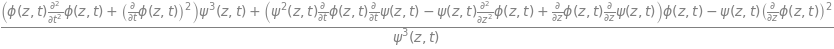

In [27]:
ricciSimplified[1,1]

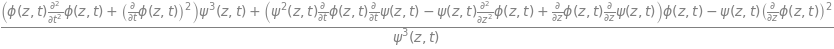

In [28]:
ricciSimplified[2,2]

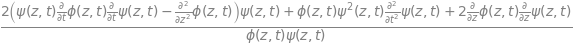

In [29]:
ricciSimplified[3,3]